# - Exercici 2
Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

**Important**

**El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!**

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Ho obro utilitzant pd.read_table en ves de pd.read_csv, perque les dades estan separades per '::' i llavors s'utilitza aquesta funció de pandas, la funció pd.read_csv s'utilitza quan els camps estan separats per comes i no per dos punts


In [2]:
movies = pd.read_table('C:/Users/julia/DATA SCIENCE IT/SPRINT 4/T2/movies.dat', sep='::', engine ='python', names= ['Pel·lícula', 'Gènere'], encoding='latin1').reset_index(drop=True)
movies.head()

,Pel·lícula,Gènere
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy


In [3]:
movies.shape

(3883, 2)

In [4]:
movies.isna().sum()

Pel·lícula    0
Gènere        0
dtype: int64

Un cop hem vist, quantes dades tenim i que no hi ha valors nuls, procedim a posar el dataframe més pràctic:

In [5]:
movies['Any'] = movies['Pel·lícula'].str.extract(r'\((\d{4})\)').astype(int)
movies

,Pel·lícula,Gènere,Any
0,Toy Story (1995),Animation|Children's|Comedy,1995
1,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,Grumpier Old Men (1995),Comedy|Romance,1995
3,Waiting to Exhale (1995),Comedy|Drama,1995
4,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...
3878,Meet the Parents (2000),Comedy,2000
3879,Requiem for a Dream (2000),Drama,2000
3880,Tigerland (2000),Drama,2000
3881,Two Family House (2000),Drama,2000


Ara procedeixo a treure els anys de la columna Títol:

In [6]:
movies['Pel·lícula'] = movies['Pel·lícula'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()
movies

,Pel·lícula,Gènere,Any
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995
...,...,...,...
3878,Meet the Parents,Comedy,2000
3879,Requiem for a Dream,Drama,2000
3880,Tigerland,Drama,2000
3881,Two Family House,Drama,2000


A la columna gènere només deixare el primer tipus de gènere en aquelles pelicules que n'hi hagi més d'un:

In [7]:
movies['Gènere'] = movies['Gènere'].str.extract(r'^([^|]+)')
movies

,Pel·lícula,Gènere,Any
0,Toy Story,Animation,1995
1,Jumanji,Adventure,1995
2,Grumpier Old Men,Comedy,1995
3,Waiting to Exhale,Comedy,1995
4,Father of the Bride Part II,Comedy,1995
...,...,...,...
3878,Meet the Parents,Comedy,2000
3879,Requiem for a Dream,Drama,2000
3880,Tigerland,Drama,2000
3881,Two Family House,Drama,2000


In [8]:
movies.duplicated().sum()


0

Ara ja tenim el dataframe tal i com ens demanava l'anunciat de l'exercici 2. Procedim al 3:
## Exercici 3

**Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?**

**Fes una o dues representacions gràfiques i justifica la teva elecció.**

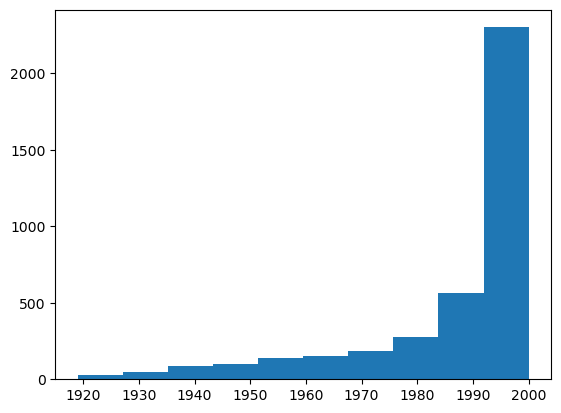

In [9]:
plt.hist(movies['Any'])

plt.show()

Text(0.5, 1.0, 'Nombre de Pel·lícules per Any')

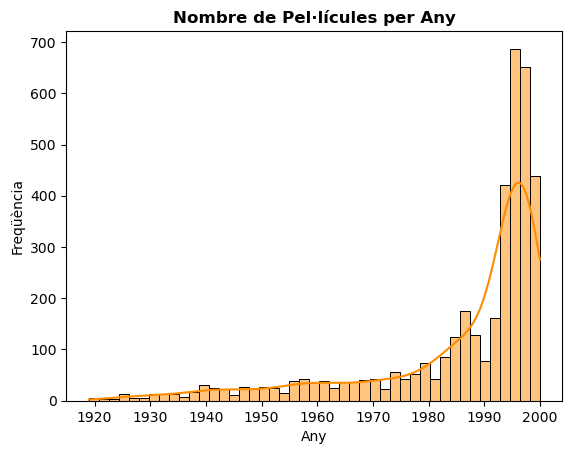

In [10]:
sns.histplot(data=movies, x='Any', bins=45
             , color='darkorange', kde=True)
plt.ylabel('Freqüència')
plt.title('Nombre de Pel·lícules per Any', fontweight='bold')


He decidit utilitzar el histograma de seaborn perque podia fer la KDE de forma mes senzilla que no pas amb el matplotlib. S'observa que el dataframe esta basat en pel·lícules de sobretot la decadada del 90 fins al 2000, després ja no tenim mes dades.

Text(0.5, 1.0, 'Distribució de les Pel·lícules per Gènere')

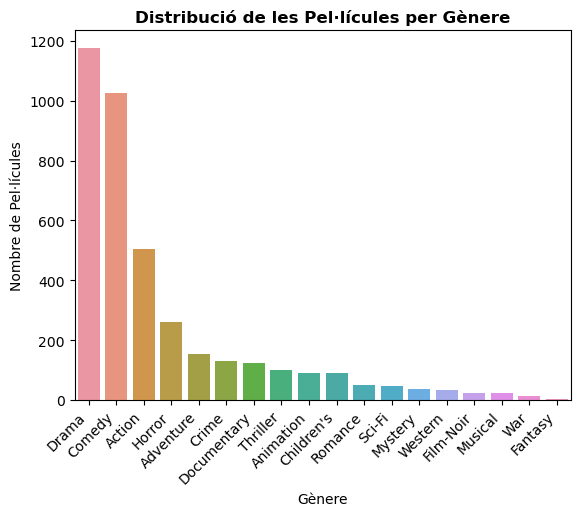

In [11]:
generes = movies['Gènere'].value_counts()
sns.barplot(x=generes.index, y=generes.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Gènere')
plt.ylabel('Nombre de Pel·lícules')

plt.title('Distribució de les Pel·lícules per Gènere', fontweight = 'bold')

Com que m'agradaria més veure-ho en horitzontal per veure realment el pes del gènere en les pelicules, canvio les dades dels eixos *x* i *y*:

Text(0.5, 1.0, 'Distribució de les Pel·lícules per Gènere')

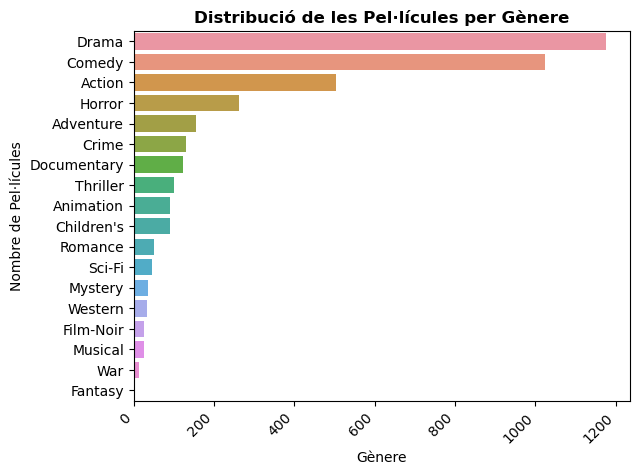

In [12]:
generes = movies['Gènere'].value_counts()
sns.barplot(x=generes.values, y=generes.index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Gènere')
plt.ylabel('Nombre de Pel·lícules')

plt.title('Distribució de les Pel·lícules per Gènere', fontweight = 'bold')

Ara anem a fer un boxplot per veure quins gèneres predominen a cada any i quins no:

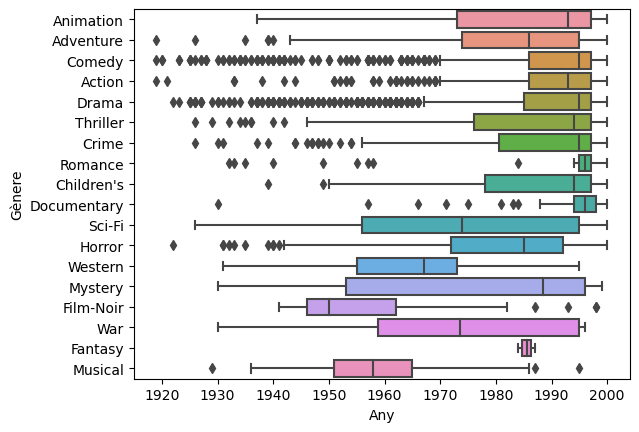

In [13]:
sns.boxplot(data=movies, x='Any', y='Gènere')
plt.show()

Ara el posem mes bonic:

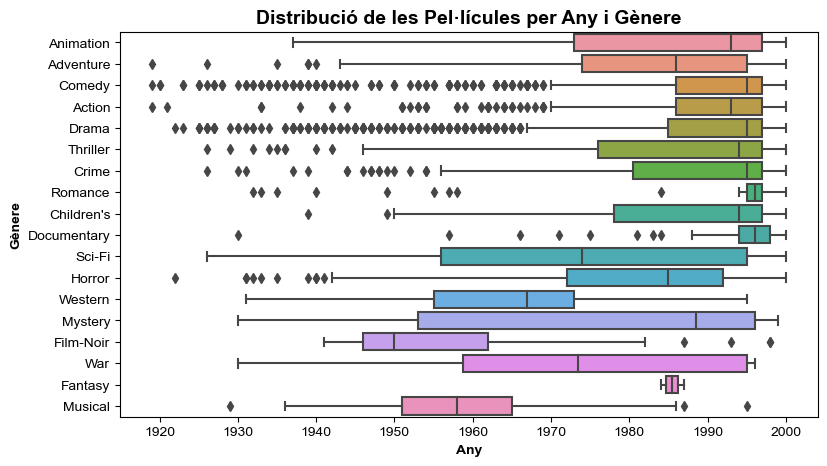

In [14]:
plt.figure(figsize=(9,5))
sns.boxplot(data=movies, x='Any', y='Gènere')
sns.set_theme(style='darkgrid')
plt.ylabel('Gènere', fontweight='bold')
plt.xlabel('Any', fontweight='bold')
plt.title('Distribució de les Pel·lícules per Any i Gènere', fontsize=14, fontweight='bold')

plt.show()


In [15]:
(movies['Any'].max())-(movies['Any'].min())

81

He vist que també puc representar-ho aixi, trobo que es interesant a l'hora danalitzar ambdues coses, la quantitat de pelicules que te el dataset i com es tan distribuides per genere i any:

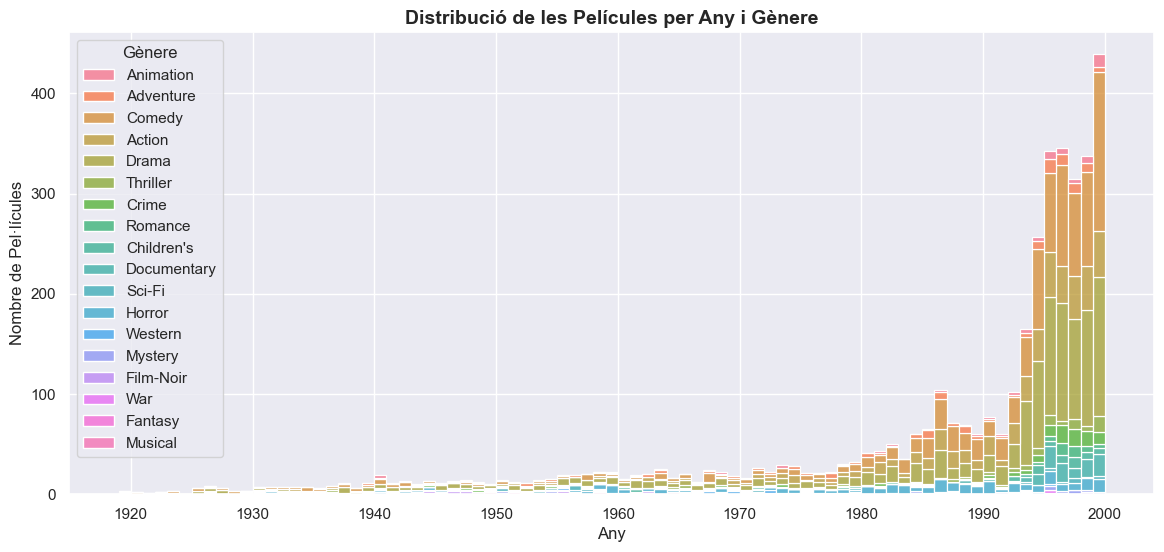

In [16]:
plt.figure(figsize=(14,6))
#Poso 81 bins perque em surti una barra per any:
sns.histplot(data = movies, x = 'Any', hue = 'Gènere', bins=81, multiple="stack")
sns.color_palette("husl", 9)
plt.ylabel('Nombre de Pel·lícules')
plt.title('Distribució de les Películes per Any i Gènere', fontweight='bold', fontsize=14)
plt.show()

Fins aqui les representacions gràfiques, existeixen diverses combinacions més, com ara pie grafics o analitzar les dades per decades, infintes combinacions